Open this notebook in binder
[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/yungchidanielcho/python-datascience-ed/blob/master/corning_merck_workshop/notebooks/data_manipulation.ipynb/HEAD)

# Readability counts

- code are read more often than writing
- we read when
    - fix bug
    - add features
    - write tests
    - use other people's functions
- we write for
    - our future selves
    - our peers
    - our future peers
    - our users
    - our successors
- easy to read code contributes to python's success
    - easier to learn
    - easier to add new features
    - easier to spot mistakes
    - easier to hire for mangers

Python's effort to improve readability

https://peps.python.org/pep-0008/

Tools to check and improve format
- checking tool: flake8
- formating tool: black

Zen of python

https://peps.python.org/pep-0020/


# Text file

In [28]:
list_of_lines = ["hi\n","how are you?\n"]

In [29]:
block_of_text = "I'm a paragraph\nSecond paragraph."
print(block_of_text)

I'm a paragraph
Second paragraph.


In [30]:
with open("text.txt", mode='w') as f:
    f.writelines(list_of_lines)
    f.write(block_of_text)


with open("text.txt", mode='r') as f:
    read_text = f.read()

print(read_text)

hi
how are you?
I'm a paragraph
Second paragraph.


In [31]:
with open("text.txt", mode='r') as f:
    read_text_in_list = f.readlines()
read_text_in_list

['hi\n', 'how are you?\n', "I'm a paragraph\n", 'Second paragraph.']

# Regular expression
- capture patterns in string
For example:
- phone number
- address parsing
- capture words that has capital letters
online tester example: https://regexr.com/

In [32]:
import re
p = re.compile(r'\d+')
p.findall('12 drummers drumming, 11 pipers piping, 10 lords a-leaping')

['12', '11', '10']

## JSON

In [33]:
import json
value = {'a': True, 'b': 3}
value

{'a': True, 'b': 3}

In [34]:
encoded = json.dumps(value)
encoded

'{"a": true, "b": 3}'

In [35]:
decoded = json.loads(encoded)
decoded

{'a': True, 'b': 3}

In [36]:
decoded == value

True

## NumPy
* Written in C, exposed through Python
* Extremely fast and memory efficient for numeric processing
* Primary feature is the ndarray - a machine-typed n-dimensional array

In [37]:
import numpy as np
x = np.array([1, 2, 3, 4])
x

array([1, 2, 3, 4])

In [38]:
print(
    x.sum(),
    x.mean()
)

10 2.5


In [39]:
print(
    x * 2, # arithmetic on ndarrays is element-wise
    x + 2,
    x > 2 # same for boolean expressions
)

[2 4 6 8] [3 4 5 6] [False False  True  True]


In [40]:
x = np.array([1, 2, 3])
y = np.array([4, 5, 6])

x * y

array([ 4, 10, 18])

In [41]:
np.dot(x, y)

32

In [ ]:
# Advanced indexing with integer or boolean lists / arrays
print (
    x[[1, 2]],
    x[[False, True, True]],
    x[x > 2]
)

In [ ]:
# Multidimensional array

mx = np.array([[0, 1, 2, 3, 4], [5, 6, 7, 8, 9]])
mx.shape


In [47]:
# Array slicing works for each dimension

for nda in [
    mx[0, 0],
    mx[:, 0],
    mx[:, 1:3],
    mx[:, 1:],
    mx[:, :3],
]:
    print(nda)

0
[0 5]
[[1 2]
 [6 7]]
[[1 2 3 4]
 [6 7 8 9]]
[[0 1 2]
 [5 6 7]]


In [49]:
# np.arange() works like the Python builtin range()

np.arange(10).reshape((2, 5))

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [50]:
np.zeros((2, 5))

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [51]:
np.ones((2, 5))

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

## Pandas
* Also written in C and exposed in Python
* Extends NumPy
* Data frames / series, transformations, and file handling

In [ ]:
!pip install palmerpenguins pandas matplotlib seaborn

In [ ]:
import pandas as pd

# Valid URL schemes include http, ftp, s3, gs, and file.
df = pd.read_csv('file://localhost/home/name/work/penguins.csv')
df = pd.read_excel('file://localhost/home/name/work/penguins.xls')

In [ ]:
path = 'path/to/file'
df.to_csv(path)
df.to_excel(path)

In [52]:
from palmerpenguins import load_penguins
df = load_penguins()
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [53]:
# Columns can be accessed as series. Series behave like NumPy arrays.
# Dataframe[] notation select the lower dimension, which is the columns
# So for Dataframe with
df['bill_length_mm']

0      39.1
1      39.5
2      40.3
3       NaN
4      36.7
       ... 
339    55.8
340    43.5
341    49.6
342    50.8
343    50.2
Name: bill_length_mm, Length: 344, dtype: float64

In [54]:
df['bill_length_mm'].describe()

count    342.000000
mean      43.921930
std        5.459584
min       32.100000
25%       39.225000
50%       44.450000
75%       48.500000
max       59.600000
Name: bill_length_mm, dtype: float64

In [55]:
df['species'] == 'Adelie'

0       True
1       True
2       True
3       True
4       True
       ...  
339    False
340    False
341    False
342    False
343    False
Name: species, Length: 344, dtype: bool

In [56]:
# slicing by both rows and column use .loc
#.loc use [row, column]

df.loc[df['species'] == 'Adelie', 'bill_length_mm'].describe()

count    151.000000
mean      38.791391
std        2.663405
min       32.100000
25%       36.750000
50%       38.800000
75%       40.750000
max       46.000000
Name: bill_length_mm, dtype: float64

In [57]:
df['bill_diff'] = df['bill_length_mm'] - df['bill_depth_mm']
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,bill_diff
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,20.4
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,22.1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,22.3
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,17.4
...,...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009,36.0
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009,25.4
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009,31.4
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009,31.8


In [59]:
df[['species', 'bill_length_mm', 'bill_depth_mm']].groupby('species').mean()

,bill_length_mm,bill_depth_mm
species,,
Adelie,38.791391,18.346358
Chinstrap,48.833824,18.420588
Gentoo,47.504878,14.982114


##  matplotlib

* Python's dominant 2D and 3D visualization platform
* Flexible
* Fairly accessible to new users, extremely powerful for pro users

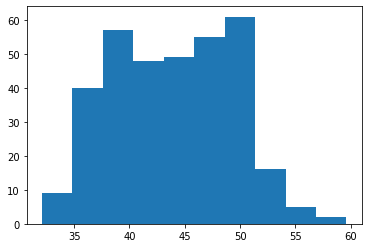

In [60]:
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.hist(df['bill_length_mm'])
plt.show()

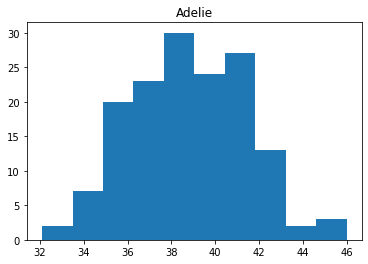

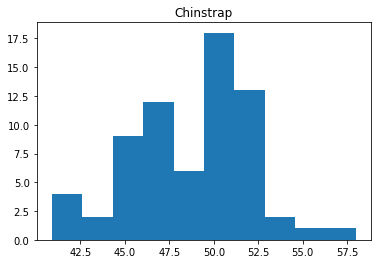

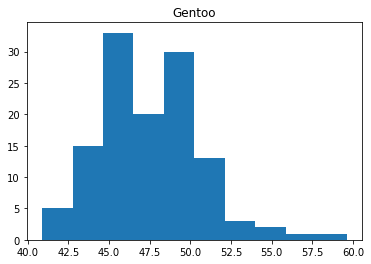

In [61]:
species = df['species'].astype('category').cat

for s in species.categories:
    plt.title(s)
    plt.hist(df['bill_length_mm'][df['species'] == s])
    plt.show()

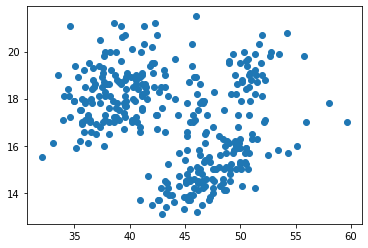

In [62]:
plt.scatter(df['bill_length_mm'], df['bill_depth_mm'])
plt.show()

C:\Users\choy3\AppData\Local\Temp\ipykernel_21216\737460757.py:15: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='both', color='grey', linestyle='--')


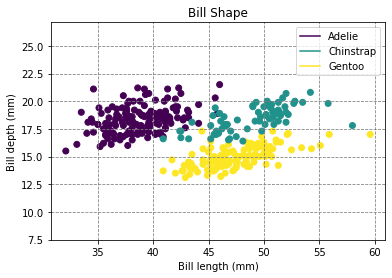

In [63]:
plt.title('Bill Shape')
plt.xlabel('Bill length (mm)')
plt.ylabel('Bill depth (mm)')

scatter = plt.scatter(
    df['bill_length_mm'], 
    df['bill_depth_mm'], 
    c=species.codes
)

for i, label in enumerate(species.categories):
    plt.plot([], color=scatter.cmap(scatter.norm(i)), label=label)

plt.legend()
plt.grid(b=True, which='both', color='grey', linestyle='--')
plt.axis('equal')

plt.show()
plt.close()

C:\Users\choy3\AppData\Local\Temp\ipykernel_21216\3386603386.py:18: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='both', color='grey', linestyle='--')


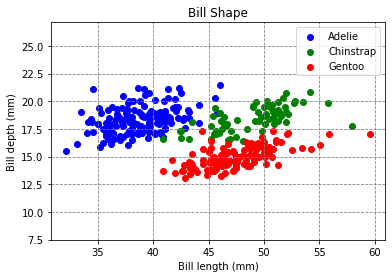

In [64]:
plt.title('Bill Shape')
plt.xlabel('Bill length (mm)')
plt.ylabel('Bill depth (mm)')

colors = ['b', 'g', 'r']

for i, label in enumerate(species.categories):
    filtered_df = df[df['species'] == label]
    species = filtered_df['species'].astype('category').cat
    scatter = plt.scatter(
        filtered_df['bill_length_mm'], 
        filtered_df['bill_depth_mm'], 
        c=colors[i],
        label=label
    )
    
plt.legend()
plt.grid(b=True, which='both', color='grey', linestyle='--')
plt.axis('equal')

plt.show()
plt.close()

In [ ]:
# Seaborn

<AxesSubplot:xlabel='bill_length_mm', ylabel='Count'>

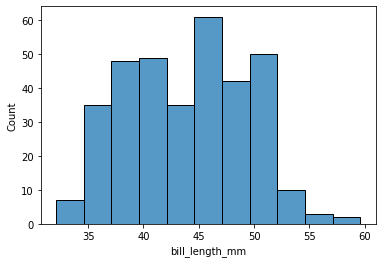

In [65]:
import seaborn as sns
sns.histplot(df['bill_length_mm'])